<a href="https://colab.research.google.com/github/vinven7/colab_home/blob/master/Hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [0]:
input1=tf.ones((2,3))
input2=tf.reshape(tf.range(1,7,dtype=tf.float32),(2,3))
output=input1+input2
with tf.Session():
  result=output.eval()
  

In [0]:
result

array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)

In [0]:
X_data=np.linspace(0,10,1000000)

In [0]:
noise=np.random.randn(len(X_data))

In [0]:
noise.shape

(1000000,)

In [0]:
noise

array([-2.94973744,  0.58530014, -0.14290855, ..., -0.07461864,
        0.60887981,  1.40345832])

In [0]:
y_true=(0.5 * X_data)+5+noise

In [0]:
x_df=pd.DataFrame(data=X_data,columns=['X Data'])

In [0]:
y_df=pd.DataFrame(data=y_true,columns=['Y'])

In [0]:
my_data=pd.concat([x_df,y_df],axis=1)

In [0]:
my_data.head()

,X Data,Y
0,0.00000,2.050263
1,0.00001,5.585305
2,0.00002,4.857101
3,0.00003,4.442496
4,0.00004,4.258247


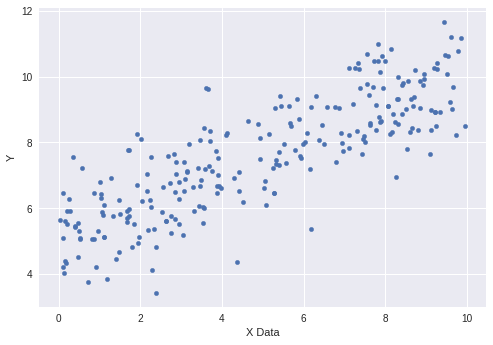

In [0]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [0]:
!pip install -q matplotlib-venn

In [0]:
from matplotlib_venn import venn2

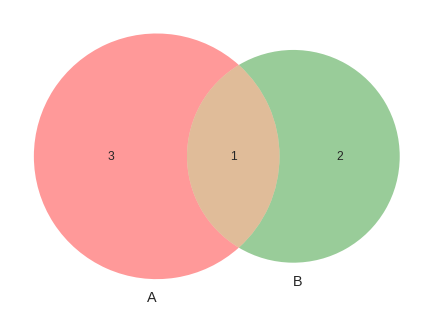

In [0]:
_=venn2(subsets=(3,2,1))

In [0]:
text = "hello" #@param {type:"string"}
time = 100 #@param {type:"integer"}
name = "Text" #@param [""] {allow-input: true}


In [0]:
text

'hello'

In [0]:
time

100

In [0]:
name

'Text'

In [0]:
time+=100

In [0]:
time

200

In [0]:
batch_size=8

In [0]:
np.random.randn(2)

array([ 0.15990505, -0.11017742])

In [0]:
m=tf.Variable(0.15)
b=tf.Variable(-0.11)

In [0]:
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])

In [0]:
y_model=m*xph+b

In [0]:
error=tf.reduce_sum(tf.square(yph-y_model))

In [0]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [0]:
train=optimizer.minimize(error)

In [0]:
init=tf.global_variables_initializer()

In [0]:
np.random.randint(len(X_data),size=batch_size)

array([739661,  35748, 667985, 883375, 708909, 909059,  48890,   6216])

In [0]:
with tf.Session() as sess:
  sess.run(init)
  batches=1000
  for i in range(batches):
    rand_ind=np.random.randint(len(X_data),size=batch_size)
    feed={xph:X_data[rand_ind],yph:y_true[rand_ind]}
    sess.run(train,feed_dict=feed)
  model_m, model_b=sess.run([m,b])

In [0]:
model_m, model_b

(0.5553248, 4.910446)

In [0]:
y_hat=X_data*model_m+model_b

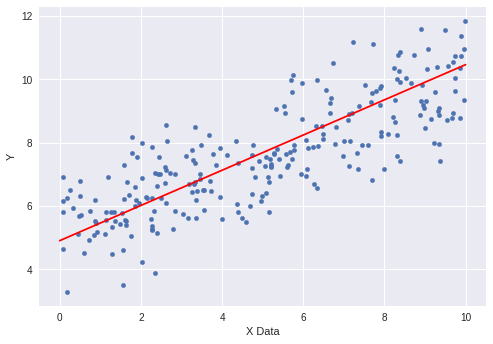

In [0]:
my_data.sample(250).plot(kind='scatter',x='X Data',y="Y")
plt.plot(X_data,y_hat,'r')

**TF ESTiMATOR**

In [0]:
feat_cols=[tf.feature_column.numeric_column('x',shape=[1])]

In [0]:
estimator=tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmppsp7hw4c', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbbdd6f51d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_eval,y_train,y_eval=train_test_split(X_data,y_true, test_size=0.3,random_state=101)

In [0]:
x_train.shape

(700000,)

In [0]:
y_train.shape

(700000,)

In [0]:
input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None, shuffle=True)

In [0]:
train_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train, batch_size=8, num_epochs=1000,shuffle=False)

In [0]:
eval_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)


In [0]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmppsp7hw4c/model.ckpt.
INFO:tensorflow:loss = 474.18875, step = 1
INFO:tensorflow:global_step/sec: 778.727
INFO:tensorflow:loss = 19.155827, step = 101 (0.130 sec)
INFO:tensorflow:global_step/sec: 947.919
INFO:tensorflow:loss = 4.705342, step = 201 (0.108 sec)
INFO:tensorflow:global_step/sec: 909.5
INFO:tensorflow:loss = 16.143589, step = 301 (0.107 sec)
INFO:tensorflow:global_step/sec: 694.541
INFO:tensorflow:loss = 22.302078, step = 401 (0.144 sec)
INFO:te

In [0]:
train_metrics=estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-15-17:39:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppsp7hw4c/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-01-15-17:39:59
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0429821, global_step = 1000, label/mean = 7.494978, loss = 8.343857, prediction/mean = 7.415737
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000:

In [0]:
printmetrics=estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-15-17:41:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppsp7hw4c/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-01-15-17:41:04
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.068173, global_step = 1000, label/mean = 7.472417, loss = 8.545384, prediction/mean = 7.394211
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: 

In [0]:
print('TRAIN DATA METRICS')
print(train_metrics)

TRAIN DATA METRICS
{'average_loss': 1.0429821, 'label/mean': 7.494978, 'loss': 8.343857, 'prediction/mean': 7.415737, 'global_step': 1000}


In [0]:
print('EVAL METRICS')
print(eval_metrics)

EVAL METRICS
{'average_loss': 1.068173, 'label/mean': 7.472417, 'loss': 8.545384, 'prediction/mean': 7.394211, 'global_step': 1000}


In [0]:
brand_new_data=np.linspace(0,10,10)

In [0]:
input_fn_predict=tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [0]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppsp7hw4c/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.436655], dtype=float32)},
 {'predictions': array([5.098374], dtype=float32)},
 {'predictions': array([5.7600927], dtype=float32)},
 {'predictions': array([6.4218116], dtype=float32)},
 {'predictions': array([7.083531], dtype=float32)},
 {'predictions': array([7.7452497], dtype=float32)},
 {'predictions': array([8.406968], dtype=float32)},
 {'predictions': array([9.068687], dtype=float32)},
 {'predictions': array([9.730407], dtype=float32)},
 {'predictions': array([10.392125], dtype=float32)}]

In [0]:
predictions=[]
for pred in estimator.predict(input_fn=input_fn_predict):
  predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmppsp7hw4c/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


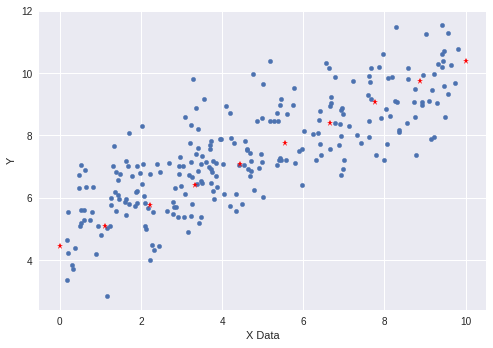

In [0]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r*')